
# Task Description

The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

# Import DataSet

In [1]:
import pandas as pd

data_path = 'C:/Users/ZAHAR AMINA/Desktop/Codsoft/Task2/IMDb India Movies.csv'
data_movies = pd.read_csv(data_path, encoding='latin_1')
data_movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Understanding

In [2]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [3]:
round((data_movies.isnull().sum()/len(data_movies))*100, 2) #Percentage of NaN values;

Name         0.00
Year         3.40
Duration    53.32
Genre       12.10
Rating      48.94
Votes       48.93
Director     3.39
Actor 1     10.43
Actor 2     15.37
Actor 3     20.27
dtype: float64

In [4]:
data_movies.describe() # 1<Rating<10

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Data cleaning

In [5]:
#Number of Rows with NaN values in all col expect Name col;
data_movies.drop('Name', axis=1, inplace=False).isna().all(axis=1).sum() 

8

In [6]:
#Delete the 8 null rows;
data_movies.dropna(subset=data_movies.columns.difference(['Name']), how="all", inplace=True)

In [7]:
#Delete special chara from name attribute using Regular Expressions;
data_movies['Name'].replace(r'[^a-zA-Z0-9\s]', '', regex=True, inplace=True)
data_movies['Name']

0                                       
1        Gadhvi He thought he was Gandhi
2                             Homecoming
3                                 Yaaram
4                         And Once Again
                      ...               
15504                Zulm Ko Jala Doonga
15505                              Zulmi
15506                          Zulmi Raj
15507                      Zulmi Shikari
15508                         ZulmOSitam
Name: Name, Length: 15501, dtype: object

In [8]:
#Delete special chara from Year attribute;
data_movies['Year'].replace(r'[^0-9\s]', '', regex=True, inplace=True)
data_movies['Year']=pd.to_numeric(data_movies['Year'], errors='coerce')

In [9]:
#Delete special chara from Duration attribute;
data_movies['Duration'].replace(r'[^0-9\s]', '', regex=True, inplace=True)
data_movies['Duration']

0         NaN
1        109 
2         90 
3        110 
4        105 
         ... 
15504     NaN
15505    129 
15506     NaN
15507     NaN
15508    130 
Name: Duration, Length: 15501, dtype: object

In [10]:
#Delete rows that contains NaN values in Rating, Votes, Year, Genre;
data_movies.dropna(subset=['Rating', 'Votes', 'Year', 'Genre'], inplace=True)
round((data_movies.isnull().sum()/len(data_movies))*100, 2) #Percentage of NaN values;

Name         0.00
Year         0.00
Duration    25.55
Genre        0.00
Rating       0.00
Votes        0.00
Director     0.06
Actor 1      1.41
Actor 2      2.25
Actor 3      3.31
dtype: float64

In [11]:
import numpy as np
data_movies['Duration'] = pd.to_numeric(data_movies['Duration'], errors='coerce')
data_movies['Duration'].fillna(np.floor(data_movies['Duration'].mean()), inplace=True) #Fill NaN values

In [12]:
data_movies['Votes']=pd.to_numeric(data_movies['Votes'].str.replace(',',''), errors='coerce') #Deal with comma in votes;

# Data Analysis

In [13]:
data_movies.corr()

C:\Users\ZAHAR AMINA\AppData\Local\Temp\ipykernel_9544\1286863771.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_movies.corr()


,Year,Duration,Rating,Votes
Year,1.000000,-0.286498,-0.168343,0.128888
Duration,-0.286498,1.000000,-0.027385,0.100212
Rating,-0.168343,-0.027385,1.000000,0.127760
Votes,0.128888,0.100212,0.127760,1.000000


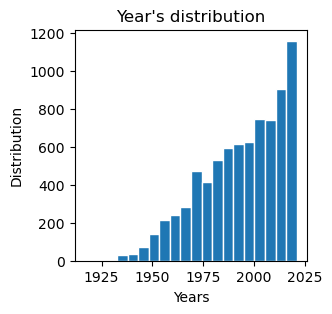

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
plt.hist(data_movies['Year'].astype('int64'), bins=20, edgecolor='white')
plt.title('Year\'s distribution')
plt.xlabel('Years')
plt.ylabel('Distribution')
plt.show()

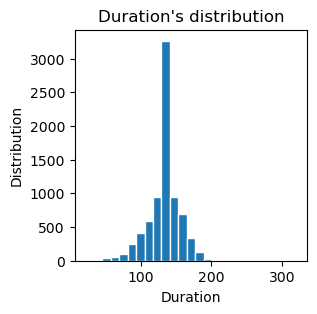

In [15]:
plt.figure(figsize=(3, 3))
plt.hist(data_movies['Duration'].astype('int64'), bins=25, edgecolor='white')
plt.title('Duration\'s distribution')
plt.xlabel('Duration')
plt.ylabel('Distribution')
plt.show()

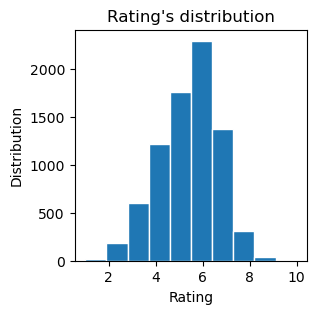

In [16]:
plt.figure(figsize=(3, 3))
plt.hist(data_movies['Rating'].astype('int64'), bins=10, edgecolor='white')
plt.title('Rating\'s distribution')
plt.xlabel('Rating')
plt.ylabel('Distribution')
plt.show()

In [17]:
data_genre=data_movies.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

#Top 3 genre;
top_3=data_movies['Genre'].value_counts().head(3).index

rating_avyear=data_genre[data_genre['Genre'].isin(top_3)]

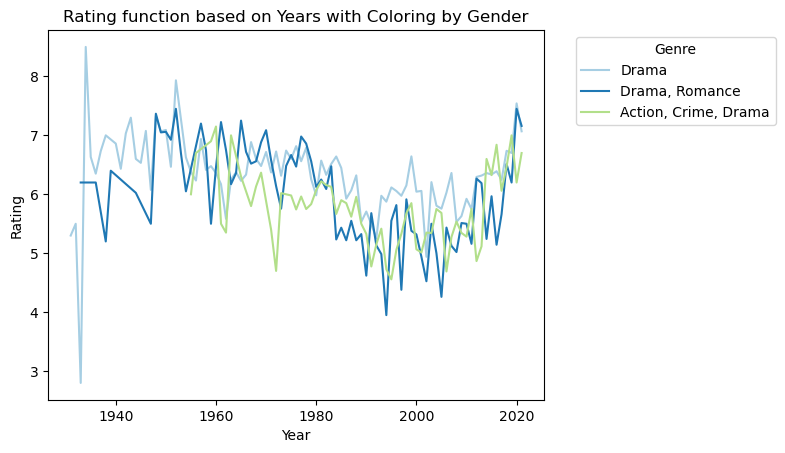

In [18]:
import seaborn as sns
palette=sns.color_palette('Paired', n_colors=len(top_3))
for i,j in zip(top_3, palette):
    specified_genre=rating_avyear[rating_avyear['Genre']==i]
    plt.plot(specified_genre['Year'], specified_genre['Rating'], label=i, marker='', linestyle='-', color=j)
    
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Rating function based on Years with Coloring by Gender')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

# Insights :

1. Name attribute has unique values.
2. the "Actor*" and "Director" attributes can be encoded by the average rating

# Preprocessing

In [19]:
#Normalisation
data_movies['Year'] = (data_movies['Year']-np.min(data_movies['Year']))/(np.max(data_movies['Year'])-np.min(data_movies['Year']))
data_movies['Votes'] = (data_movies['Votes']-np.min(data_movies['Votes']))/(np.max(data_movies['Votes'])-np.min(data_movies['Votes']))
data_movies['Duration'] = (data_movies['Duration']-np.min(data_movies['Duration']))/(np.max(data_movies['Duration'])-np.min(data_movies['Duration']))

In [20]:
#Checking NaN values in data for the last time;
(data_movies.isna().sum()/len(data_movies))*100

Name        0.000000
Year        0.000000
Duration    0.000000
Genre       0.000000
Rating      0.000000
Votes       0.000000
Director    0.063963
Actor 1     1.407189
Actor 2     2.251503
Actor 3     3.313292
dtype: float64

In [21]:
#Delete NaN rows ;
data_movies.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3', 'Director'], inplace=True)

#Encoding Features;
actor1_trans = data_movies.groupby('Actor 1')['Rating'].transform('mean')
data_movies['Actor1_trans'] = actor1_trans

actor2_trans = data_movies.groupby('Actor 2')['Rating'].transform('mean')
data_movies['Actor2_trans'] = actor2_trans

actor3_trans = data_movies.groupby('Actor 3')['Rating'].transform('mean')
data_movies['Actor3_trans'] = actor3_trans

director_trans = data_movies.groupby('Director')['Rating'].transform('mean')
data_movies['Director_trans'] = director_trans

genre_trans = data_movies.groupby('Genre')['Rating'].transform('mean')
data_movies['Genre_trans'] = genre_trans

In [22]:
selected_ds=data_movies.drop(['Name', 'Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'], axis=1, inplace=False)
selected_ds

,Year,Duration,Rating,Votes,Actor1_trans,Actor2_trans,Actor3_trans,Director_trans,Genre_trans
1,0.980769,0.293333,7.0,0.000005,6.850000,7.000000,7.000000,7.000000,6.345910
3,0.980769,0.296667,4.4,0.000051,5.420000,4.400000,4.450000,4.400000,5.700000
5,0.769231,0.420000,4.7,0.001390,4.788889,5.786667,5.766667,5.358824,6.224490
6,0.846154,0.403333,7.4,0.001828,5.300000,6.050000,6.500000,7.500000,6.820000
8,0.913462,0.203333,5.6,0.000543,5.600000,5.883333,5.600000,5.600000,5.463636
...,...,...,...,...,...,...,...,...,...
15501,0.721154,0.370000,5.3,0.000220,5.742537,6.075000,4.895652,5.571429,5.616067
15503,0.692308,0.346667,5.8,0.000066,6.328571,5.800000,5.850000,5.885714,5.616067
15504,0.682692,0.370000,4.6,0.000010,6.025532,3.700000,4.600000,4.075000,5.045524
15505,0.788462,0.360000,4.5,0.001099,5.481707,4.645455,5.617143,5.225000,5.460741


In [23]:
#Split DataSet
from sklearn.model_selection import StratifiedShuffleSplit
x=selected_ds.drop(['Rating'], axis=1)
y=selected_ds['Rating']
bins = pd.cut(y, bins=9, labels=False)
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in splitter.split(x, bins):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Create model for prediction

In [24]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
#Creat a model
model = LinearRegression()
#Train the model
model.fit(X_train,y_train)
predictions = model.predict(X_test) 

In [25]:
#Statistical R2
R2 = r2_score(y_test, predictions)
print("R² :", (R2*100).round(2), "%")

R² : 76.71 %
